In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df=pd.read_csv("netflix-plotting/data/clean/netflix_clean.csv")

In [117]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_type,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min,2021.0
1,s2,Tv Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Tv Dramas, Tv Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons,2021.0
2,s3,Tv Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Nan,2021-09-24,2021,TV-MA,1 Season,"Crime Tv Shows, International Tv Shows, Tv Act...",To protect his family from a powerful drug lor...,1.0,Season,2021.0
3,s4,Tv Show,Jailbirds New Orleans,NaN,NaN,Nan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality Tv","Feuds, flirtations and toilet talk go down amo...",1.0,Season,2021.0
4,s5,Tv Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Romantic Tv Shows, Tv ...",In a city of coaching centers known to train I...,2.0,Seasons,2021.0
5,s6,Tv Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Nan,2021-09-24,2021,TV-MA,1 Season,"Tv Dramas, Tv Horror, Tv Mysteries",The arrival of a charismatic young priest brin...,1.0,Season,2021.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Nan,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,min,2021.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0,min,2021.0
8,s9,Tv Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British Tv Shows, Reality Tv",A talented batch of amateur bakers face off in...,9.0,Seasons,2021.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0,min,2021.0


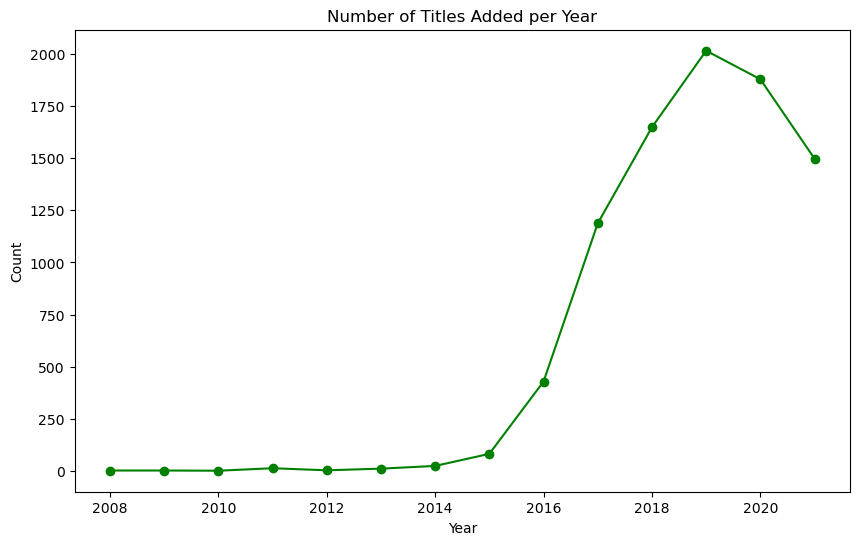

In [23]:
release_trend = df['year_added'][df['year_added'].between(2000, 2021)].dropna().astype(int).value_counts().sort_index()
plt.figure(figsize=(10,6))   # یا اندازه دلخواه
plt.plot(release_trend,color="green", marker="o")
plt.title("Number of Titles Added per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()
plt.savefig("netflix-plotting/outputs/figures/trend_by_year.png", dpi=300, bbox_inches='tight')
plt.close()


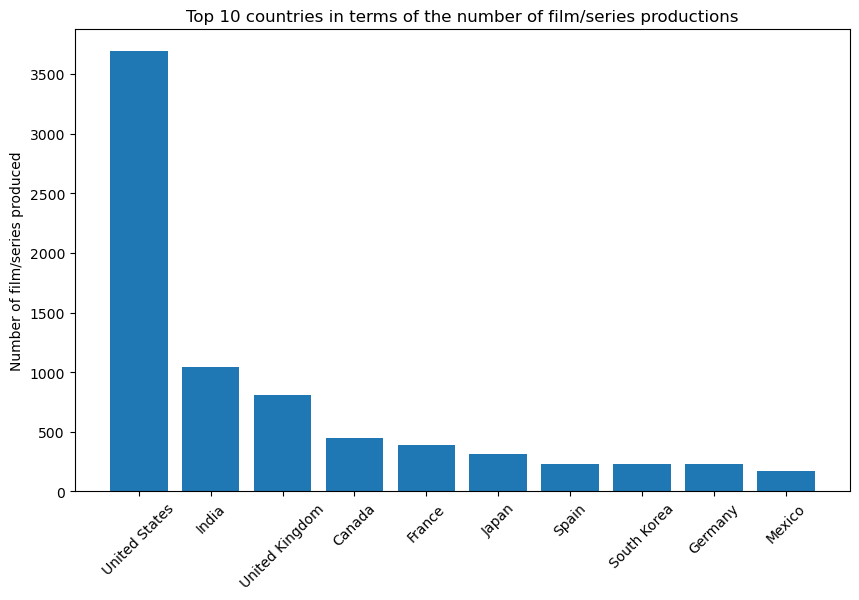

In [24]:
unique_countries =(df['country'].dropna().str.split(',').explode().str.strip().replace(['', 'Nan', 'nan', 'NaN'], np.nan).dropna().value_counts().head(10))
countries_lst=unique_countries.index.tolist()
count_lst=unique_countries.values.tolist()
plt.figure(figsize=(10,6))
plt.bar(countries_lst,count_lst)
plt.ylabel("Number of film/series produced")
plt.title("Top 10 countries in terms of the number of film/series productions")
plt.xticks(rotation=45)
plt.show()
plt.savefig("netflix-plotting/outputs/figures/Top 10 countries.png", dpi=300, bbox_inches='tight')
plt.close()

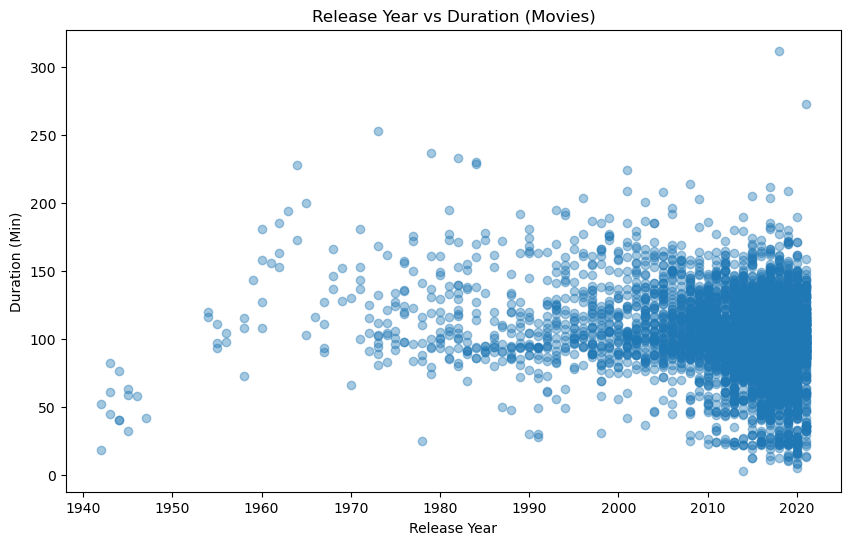

In [27]:
df_movie=df[df["type"]=="Movie"]
X_ReleasedYear=df_movie["release_year"]
Y_Duration=df_movie["duration_num"]
plt.figure(figsize=(10,6))
plt.scatter(X_ReleasedYear,Y_Duration,alpha=0.4)
plt.xlabel('Release Year')
plt.ylabel("Duration (Min)")
plt.title("Release Year vs Duration (Movies)")
plt.show()
plt.savefig("netflix-plotting/outputs/figures/scatter_year_duration.png", dpi=300, bbox_inches='tight')
plt.close()

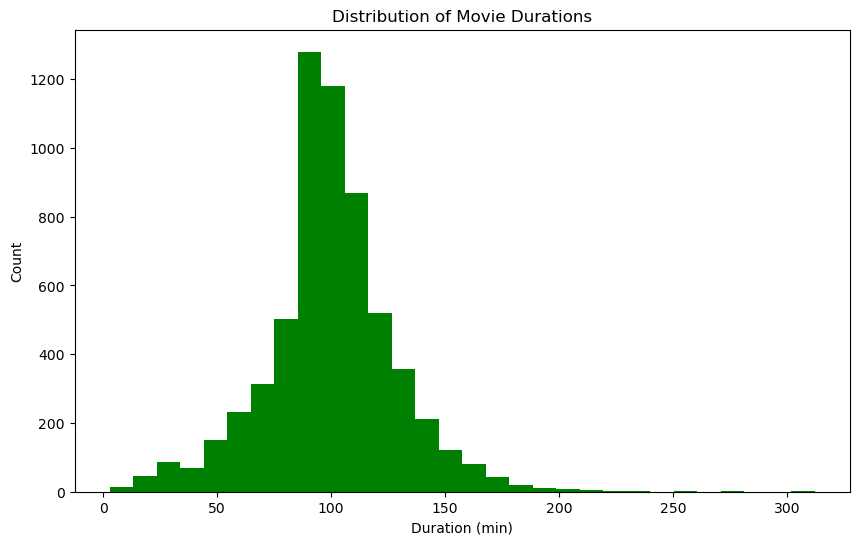

In [39]:
Dur=df_movie["duration_num"].dropna()
plt.figure(figsize=(10,6))
plt.hist(Dur, bins=30,color="green")
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (min)")
plt.ylabel("Count")
plt.show()
plt.savefig("netflix-plotting/outputs/figures/hist_duration.png", dpi=300, bbox_inches='tight')
plt.close()

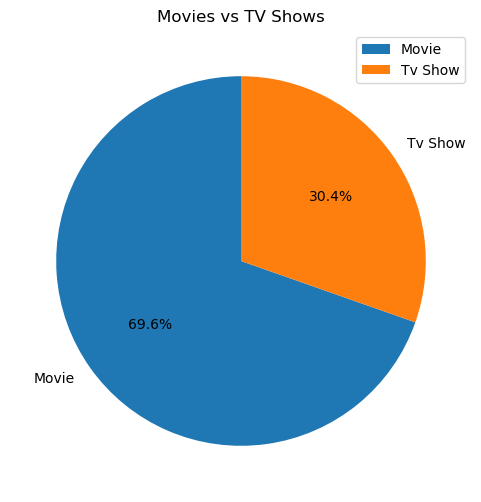

In [98]:
counts_series=df["type"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts_series.values,labels=counts_series.index, autopct='%1.1f%%', startangle=90)
plt.legend()
plt.title("Movies vs TV Shows")
plt.show()
plt.savefig("netflix-plotting/outputs/figures/pie_type.png", dpi=300, bbox_inches='tight')
plt.close()

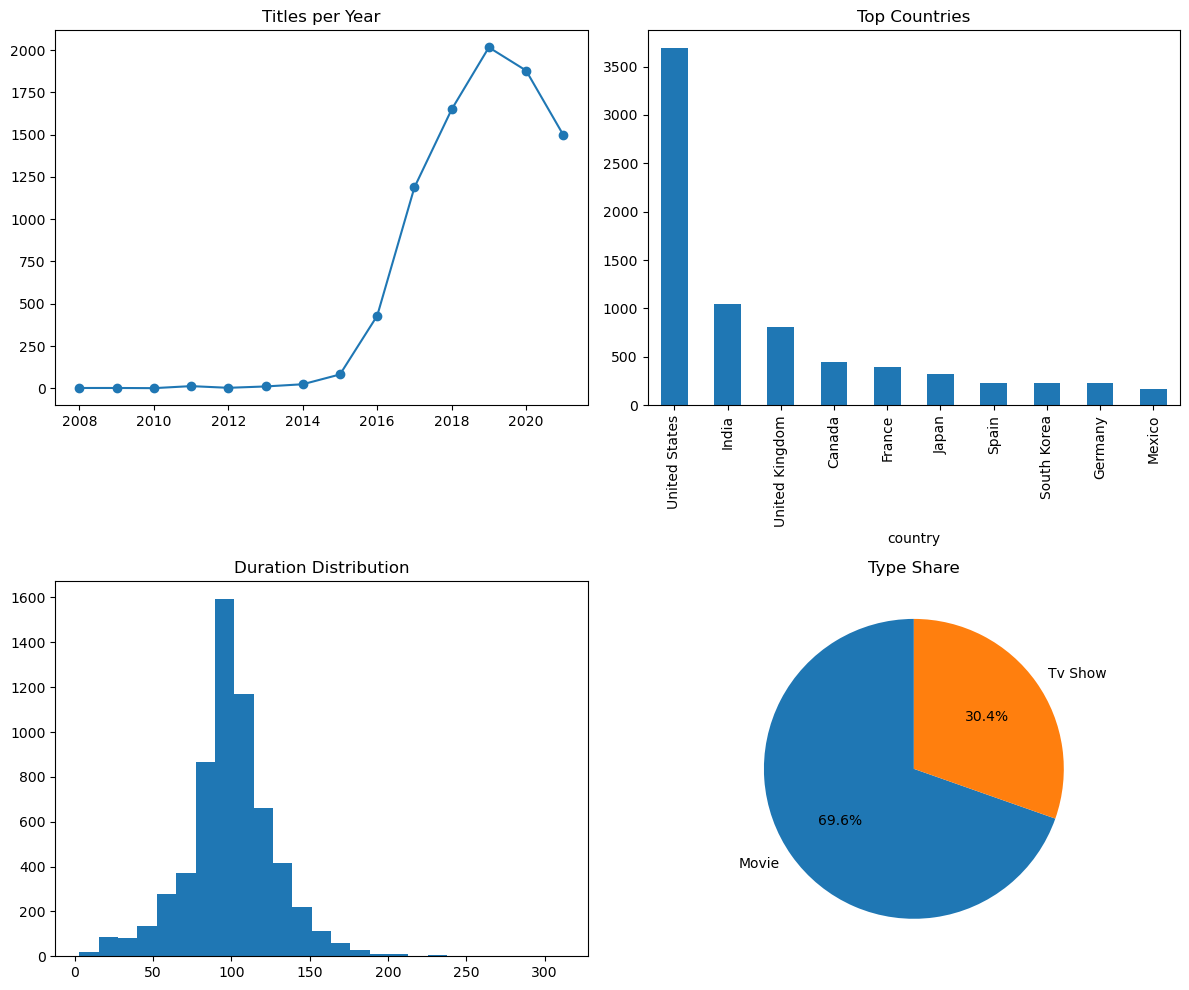

In [116]:
fig,axs=plt.subplots(2,2, figsize=(12,10))
axs[0,0].plot(release_trend.index, release_trend.values, marker='o')
axs[0,0].set_title("Titles per Year")
# top-right: top countries bar
unique_countries.plot(kind='bar', ax=axs[0,1])
axs[0,1].set_title("Top Countries")
# bottom-left: histogram
axs[1,0].hist(Dur, bins=25)
axs[1,0].set_title("Duration Distribution")
# bottom-right: pie
axs[1,1].pie(counts_series.values, labels=counts_series.index, autopct='%1.1f%%', startangle=90)
axs[1,1].set_title("Type Share")
plt.tight_layout()